In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = pd.read_csv('Data/chosen_data.csv')
data.drop('Unnamed: 0', inplace=True, axis=1)

np.random.seed(42)
idx = np.random.choice(range(len(data)),int(10e3) , replace=False)
smaller_data = data.iloc[idx]

X,y = smaller_data.drop('diagnosed_diabetes', axis=1), smaller_data['diagnosed_diabetes']

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

x_train

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,screen_time_hours_per_day,waist_to_hip_ratio,diastolic_bp,ldl_cholesterol,triglycerides,family_history_diabetes
354456,43,1,83,6.5,6.9,0.85,72,116,98,0
558155,57,1,151,5.5,6.8,0.92,66,139,177,1
126279,49,3,49,6.9,5.1,0.85,79,74,125,0
126763,57,1,38,9.9,6.9,0.82,73,89,121,0
221837,50,1,47,3.5,9.4,0.84,74,112,87,0
...,...,...,...,...,...,...,...,...,...,...
260506,51,5,393,6.2,6.1,0.86,67,89,131,0
141412,47,2,84,4.4,5.1,0.86,78,84,157,0
44799,73,1,65,4.2,5.2,0.92,75,110,99,0
243294,28,3,71,7.5,4.0,0.83,71,101,155,0


# Metric

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2664
         1.0       1.00      1.00      1.00      4336

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



{'accuracy': 1.0, 'roc_score': 1.0}

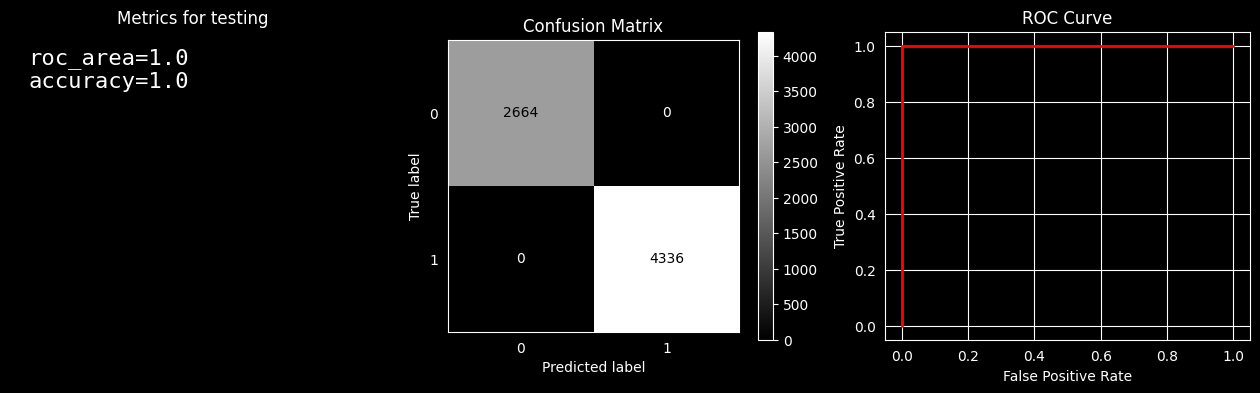

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train,y_train, "testing")

# Small Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15)

tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15)

              precision    recall  f1-score   support

         0.0       0.57      0.28      0.37      1141
         1.0       0.66      0.87      0.75      1859

    accuracy                           0.64      3000
   macro avg       0.61      0.57      0.56      3000
weighted avg       0.63      0.64      0.61      3000



{'accuracy': 0.644, 'roc_score': 0.6617403361150411}

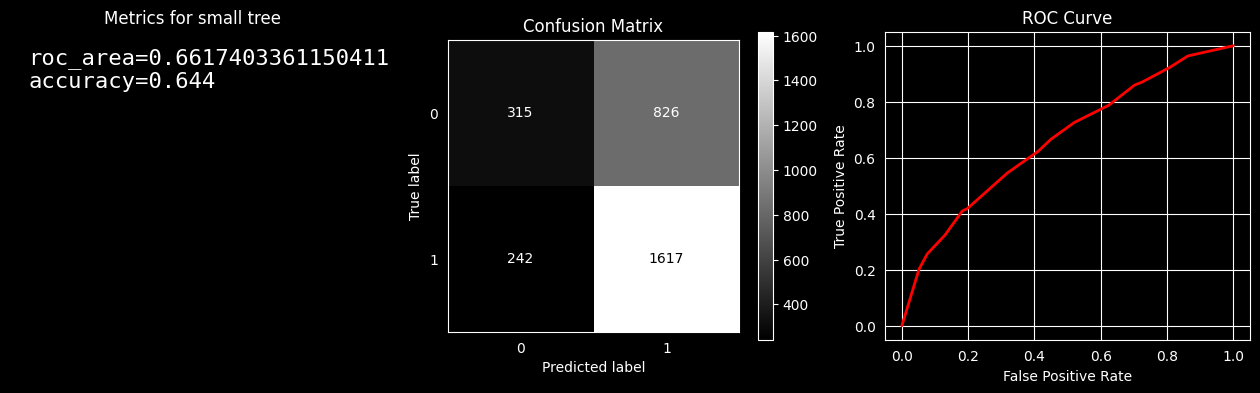

In [4]:
preds = tree.predict(x_test)
probs = tree.predict_proba(x_test)[:,1]

metrics(preds, probs, y_test, "small tree")

# Train Metrics

              precision    recall  f1-score   support

         0.0       0.62      0.31      0.42      2664
         1.0       0.68      0.88      0.77      4336

    accuracy                           0.66      7000
   macro avg       0.65      0.60      0.59      7000
weighted avg       0.65      0.66      0.63      7000



{'accuracy': 0.6648571428571428, 'roc_score': 0.684901070927939}

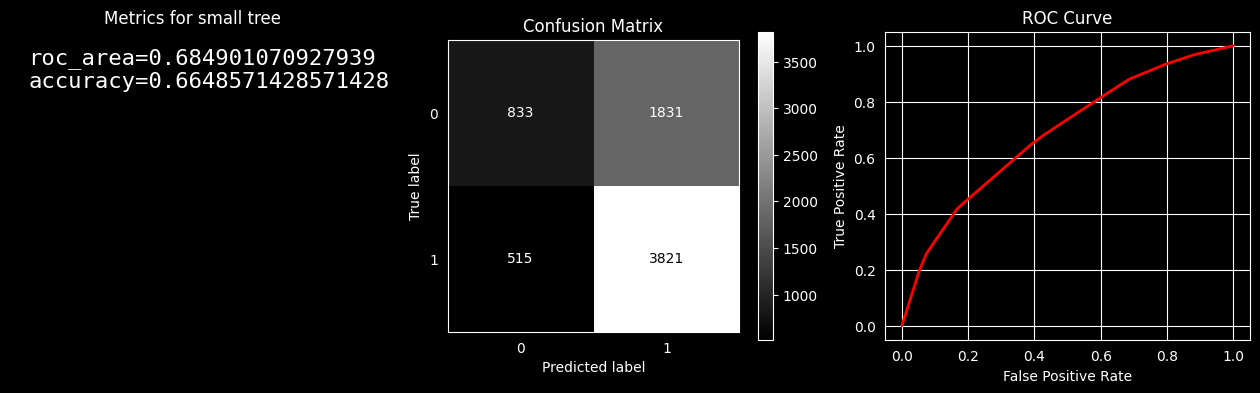

In [5]:
preds = tree.predict(x_train)
probs = tree.predict_proba(x_train)[:,1]

metrics(preds, probs, y_train, "small tree")

# Drawing a tree

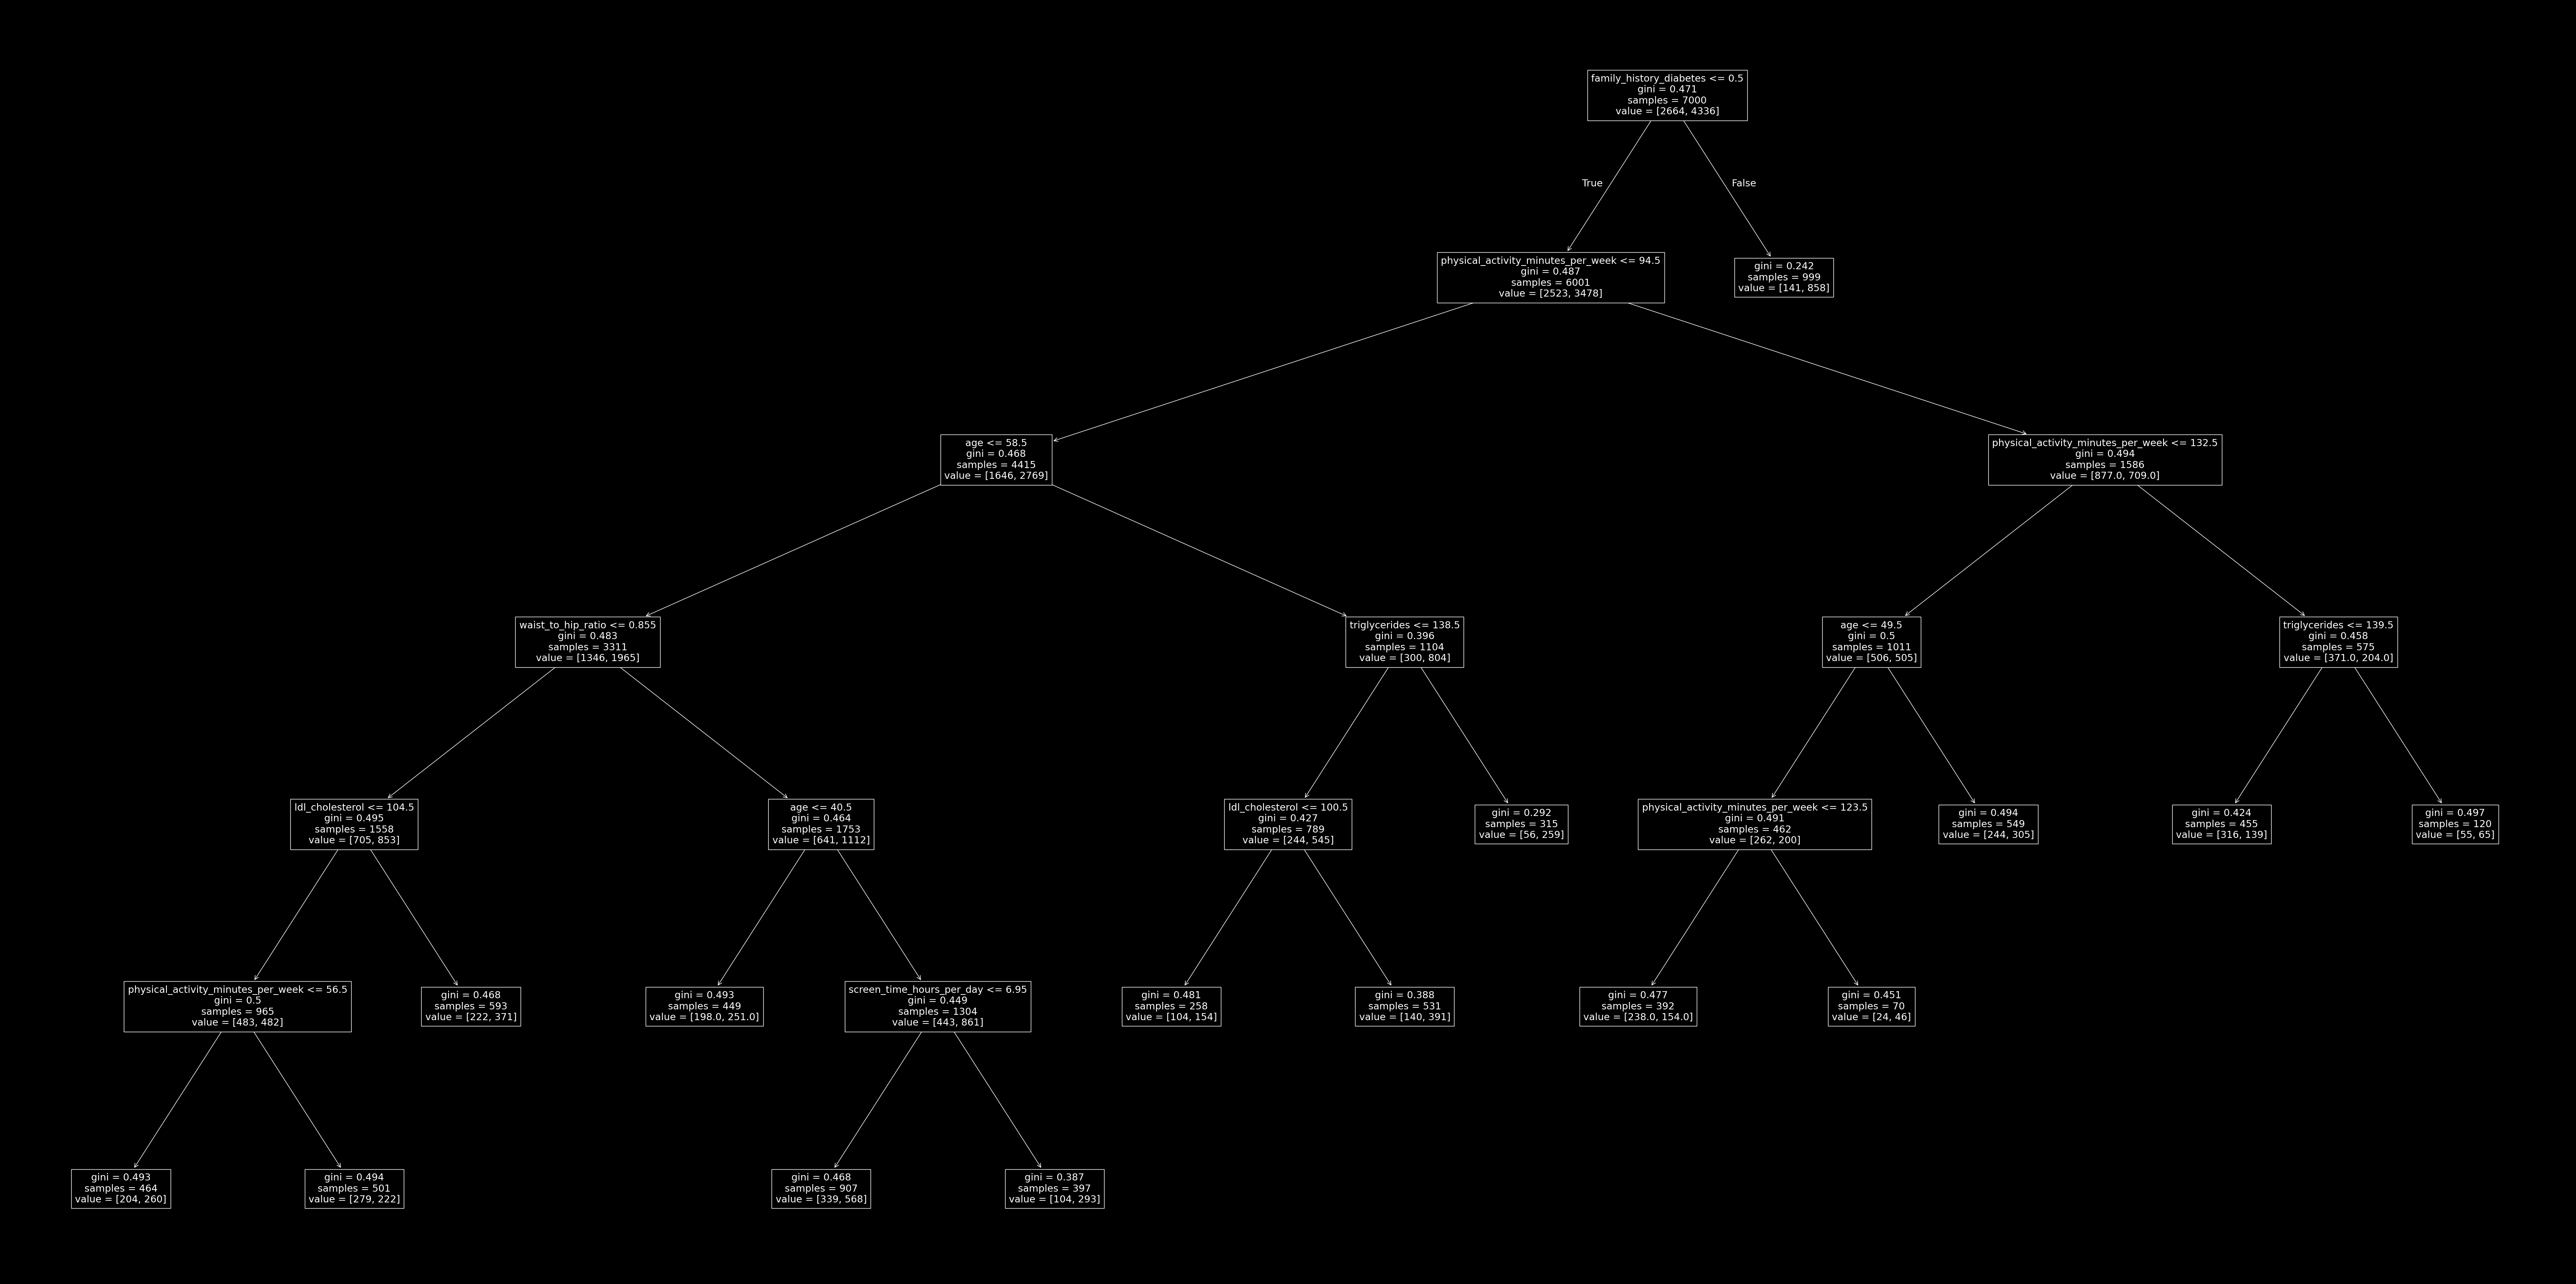

In [6]:
from sklearn.tree import plot_tree

feature_names = data.columns

plt.figure(figsize=(80, 40))
plot_tree(tree, feature_names=feature_names, filled=False)
plt.show()